# **芭樂交易價格**
- 首先我們必須先知道芭樂主要交易市場在哪邊

In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt 
import seaborn as sns
import re

%matplotlib inline

In [8]:
df_price = pd.read_csv("../data/farmproduct_guava_crawler.csv", usecols=[0,1,2,3,4,5,6,8], encoding="utf8")
df_price.head()

,日期,市場,產品,上價,中價,下價,平均價(元/公斤),交易量(公斤)
0,100/01/01,104 台北二,P1 番石榴 珍珠芭,68.7,43.5,25.6,45.0,13878
1,100/01/01,400 台中市,P1 番石榴 珍珠芭,49.3,33.2,19.6,33.7,18212
2,100/01/01,600 嘉義市,P1 番石榴 珍珠芭,55.0,32.0,20.0,32.0,1440
3,100/01/01,109 台北一,P1 番石榴 珍珠芭,69.5,40.9,24.8,43.4,34632
4,100/01/01,800 高雄市,P1 番石榴 珍珠芭,37.6,27.4,20.0,28.0,518


### **資料基本情報**

In [9]:
df_price["市場"].unique()

array(['104 台北二', '400 台中市', '600 嘉義市', '109 台北一', '800 高雄市', '930 台東市',
       '241 三重區', '830 鳳山區', '338 桃\u3000農', '260 宜蘭市', '423 東勢區',
       '420 豐原區', '220 板橋區'], dtype=object)

In [10]:
df_price.dtypes

日期            object
市場            object
產品            object
上價           float64
中價           float64
下價           float64
平均價(元/公斤)    float64
交易量(公斤)        int64
dtype: object

In [11]:
df_price.columns

Index(['日期', '市場', '產品', '上價', '中價', '下價', '平均價(元/公斤)', '交易量(公斤)'], dtype='object')

In [12]:
df_price["產品"].unique()

array(['P1 番石榴 珍珠芭 '], dtype=object)

### **修正＆刪去不必要資料**

In [14]:
# 欄位去除空白值
target_cols = ['市場', '產品']

In [16]:
df_price[target_cols] = df_price[target_cols].apply(lambda x: x.str.strip(" "))

In [17]:
df_price.loc[(df_price["市場"] == "338 桃\u3000農"), "市場"] = "338 桃農"

### **轉換資料型態**

In [18]:
df_price.head()

,日期,市場,產品,上價,中價,下價,平均價(元/公斤),交易量(公斤)
0,100/01/01,104 台北二,P1 番石榴 珍珠芭,68.7,43.5,25.6,45.0,13878
1,100/01/01,400 台中市,P1 番石榴 珍珠芭,49.3,33.2,19.6,33.7,18212
2,100/01/01,600 嘉義市,P1 番石榴 珍珠芭,55.0,32.0,20.0,32.0,1440
3,100/01/01,109 台北一,P1 番石榴 珍珠芭,69.5,40.9,24.8,43.4,34632
4,100/01/01,800 高雄市,P1 番石榴 珍珠芭,37.6,27.4,20.0,28.0,518


In [19]:
df_price.dtypes

日期            object
市場            object
產品            object
上價           float64
中價           float64
下價           float64
平均價(元/公斤)    float64
交易量(公斤)        int64
dtype: object

In [20]:
# 民國轉成西元
df_price["日期"] = df_price["日期"].apply(lambda x: re.sub("\d{3}", "{}".format((int(x.split("/")[0]) + 1911)), x))

In [21]:
# object -> datetime
df_price["日期"] = df_price["日期"].astype("datetime64")

In [22]:
df_price.dtypes

日期           datetime64[ns]
市場                   object
產品                   object
上價                  float64
中價                  float64
下價                  float64
平均價(元/公斤)           float64
交易量(公斤)               int64
dtype: object

In [23]:
# 清理完後放入，cleaned data區
df_price.to_csv("cleaned data/價格_全國芭樂交易資料(初步清洗).csv", index=False)

### **觀察哪個市場交易量最大，最具參考性**

前三大市場
- 台中
- 三重
- 台北一

In [24]:
# 粗淺地groupy各市場歷年交易量總和 => 發現台中市獨佔鰲頭
df_price.groupby("市場").agg({"交易量(公斤)":"sum"}).sort_values("交易量(公斤)", ascending=False)


,交易量(公斤)
市場,
241 三重區,154811963
109 台北一,134274572
400 台中市,107214247
104 台北二,78632123
830 鳳山區,15056330
220 板橋區,12550182
600 嘉義市,8691523
260 宜蘭市,6844460
800 高雄市,6017153


#### **歷年前五大交易市場**

In [25]:
# 進一步分析每年每個市場總量，由此可知，台中都是交易量最大的市場
df_price["Year"] = df_price["日期"].dt.year                   # 創建一個Year欄位來當groupby鍵值
df_agg = (df_price.groupby(["Year", "市場"]).agg({"交易量(公斤)":"sum"})/1000).round(1)
g = df_agg["交易量(公斤)"].groupby("Year", group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False).head(5))
res

Year  市場     
2011  241 三重區    14850.4
      109 台北一    14074.8
      400 台中市    10543.4
      104 台北二     7376.5
      830 鳳山區     1281.9
2012  241 三重區    15722.9
      109 台北一    13286.3
      400 台中市    10436.9
      104 台北二     6759.4
      830 鳳山區     2060.9
2013  241 三重區    17370.0
      109 台北一    14663.6
      400 台中市    11142.7
      104 台北二     8299.6
      830 鳳山區     2307.3
2014  241 三重區    15385.9
      109 台北一    12431.9
      400 台中市     9917.7
      104 台北二     7097.1
      830 鳳山區     1845.1
2015  241 三重區    13566.8
      109 台北一    11508.7
      400 台中市     8962.2
      104 台北二     7608.7
      260 宜蘭市     1281.1
2016  241 三重區    14224.6
      109 台北一    11542.3
      400 台中市     9641.0
      104 台北二     7352.2
      830 鳳山區     1188.4
2017  241 三重區    14424.2
      109 台北一    12623.8
      400 台中市    10218.2
      104 台北二     8620.9
      220 板橋區     2104.7
2018  241 三重區    13178.5
      109 台北一    11486.3
      400 台中市     9714.3
      104 台北二     6330.7
      220 板

In [26]:
# 2020年
df_2020 = df_price.loc[df_price["Year"] == 2020]
df_2020.groupby("市場").agg({"交易量(公斤)":sum}).sort_values(by="交易量(公斤)", ascending=False)

,交易量(公斤)
市場,
241 三重區,14929024
109 台北一,13650615
400 台中市,10861024
104 台北二,7653267
220 板橋區,3294422
600 嘉義市,1314600
420 豐原區,1233590
830 鳳山區,1103810
260 宜蘭市,628440


In [27]:
df_2020.groupby("市場").agg({"交易量(公斤)":sum, "平均價(元/公斤)": "mean"}).sort_values(by="交易量(公斤)", ascending=False)

,交易量(公斤),平均價(元/公斤)
市場,,
241 三重區,14929024,24.617508
109 台北一,13650615,29.757239
400 台中市,10861024,24.342424
104 台北二,7653267,30.569024
220 板橋區,3294422,20.159596
600 嘉義市,1314600,19.501520
420 豐原區,1233590,20.118771
830 鳳山區,1103810,22.734061
260 宜蘭市,628440,31.991031


### **價格趨勢: 前4大市場是否價格&產量曲線相同**

In [29]:
markets = df_price[['日期', '市場', '平均價(元/公斤)', '交易量(公斤)', 'Year']]
markets.columns = ["Date", "Market", "Avg price", "Volume(kg)", "Year"]
markets.set_index("Date", inplace=True)
markets

,Market,Avg price,Volume(kg),Year
Date,,,,
2011-01-01,104 台北二,45.0,13878,2011
2011-01-01,400 台中市,33.7,18212,2011
2011-01-01,600 嘉義市,32.0,1440,2011
2011-01-01,109 台北一,43.4,34632,2011
2011-01-01,800 高雄市,28.0,518,2011
...,...,...,...,...
2021-07-08,830 鳳山區,28.0,2710,2021
2021-07-08,260 宜蘭市,35.0,2050,2021
2021-07-08,241 三重區,28.1,33006,2021


In [30]:
# 台中
TC = markets[markets["Market"] == "400 台中市"].drop(columns=["Market", "Year"])
TC.columns = ["TC_Avg price", "TC_Volume(kg)"]
TC = TC.resample("D").fillna("ffill")

In [34]:
# 台北一
TP1 = markets[markets["Market"] == "109 台北一"].drop(columns=["Market", "Year"])
TP1.columns = ["TP1_Avg price", "TP1_Volume(kg)"]
TP1 = TP1.resample("D").fillna("ffill")

In [32]:
# 三重(新北)
NTP = markets[markets["Market"] == "241 三重區"].drop(columns=["Market", "Year"])
NTP.columns = ["NTP_Avg price", "NTP_Volume(kg)"]
NTP = NTP.resample("D").fillna("ffill")

In [33]:
# 台北一
TP2 = markets[markets["Market"] == "104 台北二"].drop(columns=["Market", "Year"])
TP2.columns = ["TP2_Avg price", "TP2_Volume(kg)"]
TP2 = TP2.resample("D").fillna("ffill")

In [35]:
dfs = [TP1, TP2, NTP, TC]
df_total = pd.concat(dfs, join='inner', axis=1)
df_total

,TP1_Avg price,TP1_Volume(kg),TP2_Avg price,TP2_Volume(kg),NTP_Avg price,NTP_Volume(kg),TC_Avg price,TC_Volume(kg)
Date,,,,,,,,
2011-01-01,43.4,34632,45.0,13878,37.9,34495,33.7,18212
2011-01-02,48.2,25303,47.5,13510,38.9,24739,36.1,22148
2011-01-03,48.2,25303,47.5,13510,38.9,24739,36.1,22148
2011-01-04,43.6,36820,47.5,11730,39.1,24677,36.1,22467
2011-01-05,44.4,25043,45.8,10658,39.6,23480,35.6,17132
...,...,...,...,...,...,...,...,...
2021-07-04,34.1,32929,32.3,23984,27.5,36127,28.6,22960
2021-07-05,34.1,32929,32.3,23984,27.5,36127,28.6,22960
2021-07-06,36.1,34546,32.9,23062,27.1,36871,27.3,32462


In [47]:
df_avg_price = df_total[["TP1_Avg price", "TP2_Avg price", "TC_Avg price", "NTP_Avg price"]]
df_price_corr = df_avg_price.corr()["NTP_Avg price"][:-1]
df_price_corr

TP1_Avg price    0.959168
TP2_Avg price    0.953443
TC_Avg price     0.955621
Name: NTP_Avg price, dtype: float64

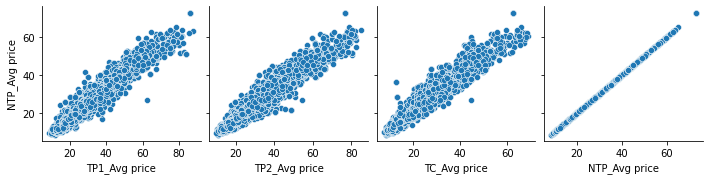

In [48]:
sns.pairplot(data=df_avg_price, diag_kind=None,
             x_vars=df_avg_price.columns,
             y_vars="NTP_Avg price")

In [49]:
df_volume = df_total[["TP1_Volume(kg)", "TP2_Volume(kg)", "TC_Volume(kg)", "NTP_Volume(kg)"]]
df_vol_corr = df_volume.corr()["NTP_Volume(kg)"][:-1]
df_vol_corr

TP1_Volume(kg)    0.873057
TP2_Volume(kg)    0.771839
TC_Volume(kg)     0.771079
Name: NTP_Volume(kg), dtype: float64

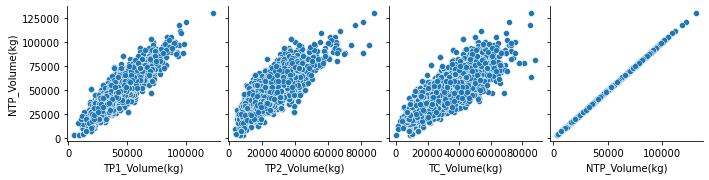

In [51]:
sns.pairplot(data=df_volume, diag_kind=None,
             y_vars=["NTP_Volume(kg)"])

#### Plotting 

<AxesSubplot:xlabel='Date'>

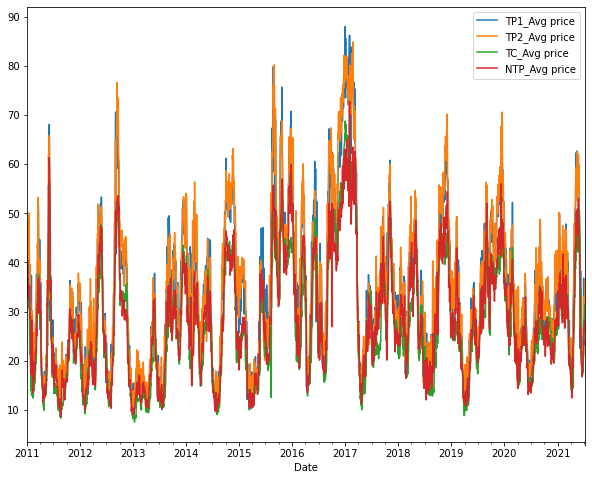

In [52]:
df_avg_price.plot(figsize=(10, 8), sharex=True, kind='line')

<AxesSubplot:xlabel='Date'>

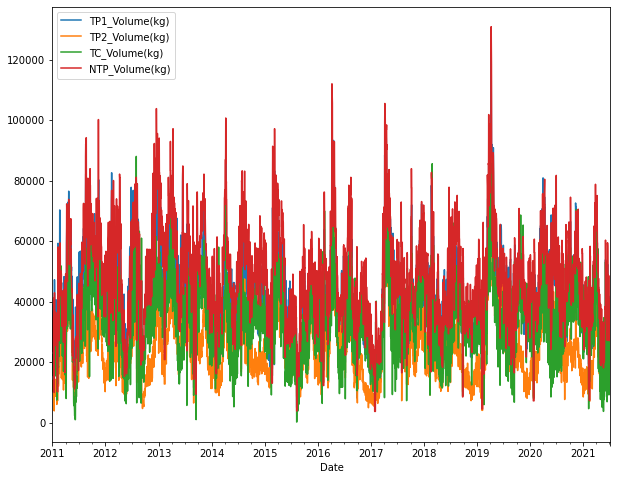

In [53]:
df_volume.plot(figsize=(10, 8), sharex=True, kind='line')

In [54]:
df_volume.to_csv("Guava main market volume.csv")